## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


## Project Overview

## Business Understanding 

Computing Vision is a relative newcomer to the film production market, having little to no experience producing movies; for this reason, Computing Vision selected Deloitte to advise them on the creation of an initial, data-driven film production strategy.

Our measure of success was domestic Box Office revenue. We chose this metric because box office revenue is the first way film studios generate a cash flow. As a new movie studio, it is important for Computing Vision to start generating a cash flow as quickly and as largely as possible. Also, the production of films is an expensive endeavor, a successful box office performance can help recover the initial investments of creating a film. Box office revenue is also a good indicator of public sentiment as it indirectly measures how many people are physically going to watch the film in theaters. This serves as baseline check for future questioning regarding at home and digital release. 

With Box Office revenue as our primary indicator of success, we used data to answer the following question; what components of a film creates a box office hit? 

We quickly identified runtime, genre, and MPAA rating as foundational components for creating a box office hit. We identified these three components as they are the key drivers to reaching a large audience. If Computing Vision's films can capture a large audience, they have a higher probability of creating a box office hit, i.e. attract more people to pay to watch the film. 


## Data Understanding and Analysis

We focused our analysis on the Box Office Mojo dataset, known as the rt_movie_info spreadsheet as it contained the necessary box office, genre, and movie length information. 

Rationale: Import the necessary python libraries to perform analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

1. Data Cleaning process 

# Maanik Gupta

# Maya Sandlin

Text(0, 0.5, 'Revenue in Tens of Millions (USD)')

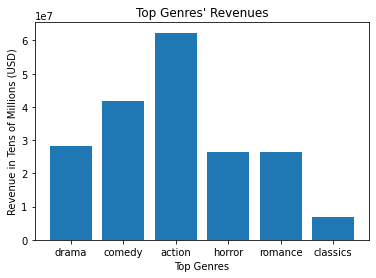

In [9]:
import pandas as pd
import numpy as np
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_review = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

movie_genre = rt_movie_info[['genre','box_office']]
clean_genre = movie_genre.dropna()
genres_sorted = movie_genre['genre'].sort_values().dropna()
genres_sorted.value_counts().head (30)
#using this data, the main six categories include: drama, comedy, horror, action, romance, and classics

#determining the average revenue

#drama
drama = clean_genre[clean_genre['genre'].str.contains('Drama')]
drama_revenue = drama ['box_office']
drama_revenue_clean = drama_revenue.dropna()
drama_avg_revenue = np.mean(drama_revenue_clean)
drama_avg_revenue

#comedy
comedy = clean_genre[clean_genre['genre'].str.contains('Comedy')]
comedy_revenue = comedy ['box_office']
comedy_revenue_clean = comedy_revenue.dropna()
comedy_avg_revenue = np.mean(comedy_revenue_clean)
comedy_avg_revenue 

#action 
action = clean_genre[clean_genre['genre'].str.contains('Action')]
action_revenue = action ['box_office']
action_revenue_clean = action_revenue.dropna()
action_avg_revenue = np.mean(action_revenue_clean)
action_avg_revenue 

#horror
horror = clean_genre[clean_genre['genre'].str.contains('Horror')]
horror_revenue = horror ['box_office']
horror_revenue_clean = horror_revenue.dropna()
horror_avg_revenue = np.mean(horror_revenue_clean)
horror_avg_revenue

#romance
romance = clean_genre[clean_genre['genre'].str.contains('Romance')]
romance_revenue = horror ['box_office']
romance_revenue_clean = romance_revenue.dropna()
romance_avg_revenue = np.mean(romance_revenue_clean)
romance_avg_revenue

#classics
classics = clean_genre[clean_genre['genre'].str.contains('Classics')]
classic_revenue = classics ['box_office']
classic_revenue_clean = classic_revenue.dropna()
classic_avg_revenue = np.mean(classic_revenue_clean)
classic_avg_revenue

top_genre={"drama":drama_avg_revenue, "comedy":comedy_avg_revenue, "action":action_avg_revenue, 
           "horror": horror_avg_revenue, "romance":romance_avg_revenue, "classics": classic_avg_revenue}

#creating the graph to compare the top genres
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots()
# plt.ticklabel_format(style='plain')
ax.bar(top_genre.keys(),top_genre.values())



ax.set_title("Top Genres' Revenues")
ax.set_xlabel("Top Genres")
ax.set_ylabel("Revenue in Tens of Millions (USD)")




# Robert Golden

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Read CSVs for later use
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_reviews = pd.read_csv('zippedData/rt.reviews.csv')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

#print(movie_gross.info())
#Clean studio, domestic_gross, & foreign_gross
#movie_gross = movie_gross.dropna()
#movie_gross.info()

rt_movie_info = rt_movie_info.dropna()
#Clean synopsis, rating, genre, director, writer, theater_date, dvd_date, runtime 
ratings = []
for rating in rt_movie_info['rating'].dropna():
    ratings.append(rating)

runtime_raw = [] #for freshly-extracted runtimes
runtime_clean = [] #rfor runtime w/o whitespace
box_off_raw = [] #for raw box office sales data
box_off_clean = [] #for box office sales data without commas or whitespace
for val in rt_movie_info['runtime'].str[:3]: #extract first 3 characters, movies under 100 min will have whitespace
    runtime_raw.append(val) 
for val in runtime_raw: #strip whitespace
    runtime_strip = val.replace(' ', '') 
    runtime_clean.append(runtime_strip)
    
for val in rt_movie_info['box_office']:
    box_off_strip = val.replace(',', '')
    box_off_clean.append(box_off_strip)

#create new column 'runtime_clean'
rt_movie_info['runtime_clean'] = runtime_clean
#create new column 'box_office_clean'
rt_movie_info['box_office_clean'] = box_off_clean

#create new dataframe
df2 = rt_movie_info[['runtime_clean','box_office_clean']].copy()
#ensure runtime valuse are recognized as integers
df2['runtime_clean'] = df2['runtime_clean'].astype(int)
#ensure box office slaes values are recognized as integers
df2['box_office_clean'] = df2['box_office_clean'].astype(int)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 4: invalid start byte

In [ ]:
#Descriptive Stats for Runtime
max1 = df2['runtime_clean'].max()
Q1_3 = df2['runtime_clean'].quantile(q=0.75)
mean1 = df2['runtime_clean'].mean()
med1 = df2['runtime_clean'].median()
std1 = df2['runtime_clean'].std()
Q1_1 = df2['runtime_clean'].quantile(q=0.25)
min1 = df2['runtime_clean'].min()

print('Descriptive Statistics for Runtime')
print('Mean runtime:', mean1)
print('')
print('Maximum runtime:', max1)
print('75th Percentile:', Q1_3)
print('Median runtime:', med1)
print('25th Percentile:', Q1_1)
print('Minimum runtime:', min1)
print('Interquartile Range:', Q1_3-Q1_1)
print('Std. Dev. of runtime:', std1)

print('99.7% of observations should lay between:', mean1-(std1*2), '-',mean1+(std1*2))

print('') #for readability
#Descriptive Stats for Box Office Sales
mean2 = df2['box_office_clean'].mean()
max2 = df2['box_office_clean'].max()
Q2_3 = df2['box_office_clean'].quantile(q=0.75)
med2 = df2['box_office_clean'].median()
Q2_1 = df2['box_office_clean'].quantile(q=0.25)
min2 = df2['box_office_clean'].min()
std2 = df2['box_office_clean'].std()

print('Descriptive Statistics for Box Office Sales')
print('Mean box office sales:', mean2)
print('')
print('Maximum sales:', max2)
print('75th Percentile:', Q2_3)
print('Median sales:', med2)
print('25th Percentile:', Q2_1)
print('Minimum sales:', min2)
print('Std. Dev of Sales:', std2)
print('Interquartile Range:', Q2_3-Q2_1)
print('99.7% of observations should lay between:', mean2-(std2*2), '-', mean2+(std2*2222))

print('') #for readability
print('Correlation Coefficient')      
print(df2.corr()) #calculate Pearson correlation coefficient for variables in df2

#generate a normal distribution where mean1 is avg, sd1 is std dev, and n=235
d1 = np.random.normal(mean1, std1, 235) 
#generate a normal distribution where mean2 is avg, sd2 is std dev, and n=235
d2 = np.random.normal(mean2, std2, 235) 

df2more = df2[df2['runtime_clean'] > 105]
df2less = df2[df2['runtime_clean'] < 105]
print('')
print('Less - Runtime Mean:', df2less['runtime_clean'].mean(), 
      'Box Office Sales Mean:', df2less['box_office_clean'].mean(), 
      'n:', len(df2less))
print('More - Runtime Mean:', df2more['runtime_clean'].mean(),
      'Box Office Sales Mean:', df2more['box_office_clean'].mean(), 
      'n:', len(df2more))
#df2['runtime_clean'].plot.box(grid='True')
#df2['box_office_clean'].plot.box(grid='True')

In [ ]:
n = 235 #sample size
df = n - 1 #degrees of freedom = sample size - 1

print('df2more variance:')
print(df2more.var())
print('df2less variance:')
print(df2less.var())
print('')
#test relationship between movie length over 105 minutes
t_ind_runtime = stats.ttest_ind(df2more['runtime_clean'], df2less['runtime_clean'], equal_var=False)

print('T-Test runtime:', t_ind_runtime)


df2


In [ ]:
sns.distplot(d1) #distribution for runtime

In [ ]:
sns.distplot(d2) #distribution for box office sales

In [ ]:
#normalized distribution for runtime
sns.distplot([(x - d1.mean())/d1.std() for x in d1]) 
#normalized distribution for box office sales
sns.distplot([(x - d2.mean())/d2.std() for x in d2])

In [ ]:
sns.regplot(df2more['runtime_clean'], df2more['box_office_clean'])
sns.regplot(df2less['runtime_clean'], df2less['box_office_clean'])

In [ ]:
fig, ax = plt.subplots() #Generate Scatter plot 

ax.scatter(df2['runtime_clean'], df2['box_office_clean'], label="actual data")



x_bounds = [min(df2['runtime_clean']), max(df2['runtime_clean'])]
y_bounds = [min(df2['box_office_clean']), max(df2['box_office_clean'])]



ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")



ax.set_title("Runtime Moderately Influences Box Office Sales")
ax.set_xlabel("Minutes")
ax.set_ylabel("Sales in USD")



ax.legend();

In [ ]:
df3 = rt_movie_info[['rating', 'box_office_clean']].copy() #copies rt_movie_info into new dataframe
df3 = df3.dropna() #drops null values

df3['box_office_clean'] = df3['box_office_clean'].astype(int) #ensures box office sales are integers

sales_groupby_rating = df3.groupby('rating')[['box_office_clean']].sum()
sales_groupby_rating = sales_groupby_rating / (10^9)

fig, ax = plt.subplots(figsize=(30,20))
ax.bar(x=sales_groupby_rating.index, height=sales_groupby_rating['box_office_clean'])
plt.title('Sales by MPAA Rating')
plt.xlabel('MPAA Ratings')
plt.ylabel('Sales in USD (Billions)')
plt.show()

# Daniel Robles

In [12]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_review = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)


conn = sqlite3.connect('C:/Users/darobles/Desktop/capstone/AIOverlordSupporters/zippedData/im.db')
cur = conn.cursor()
pd.read_sql('''SELECT * FROM SQLITE_MASTER;''', conn)



OperationalError: unable to open database file

In [13]:
from scipy import stats

In [14]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [15]:
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,10/9/1971,9/25/2001,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,8/17/2012,1/1/2013,$,600000.0,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,9/13/1996,4/18/2000,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,12/9/1994,8/27/1997,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,8/18/2006,1/2/2007,$,33886034.0,106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,7/23/1993,4/17/2001,NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1/1/1962,5/11/2004,NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,4/1/1993,1/29/2002,NaN,NaN,101 minutes,NaN


In [16]:
rt_movie_info['box_office']

0              NaN
1         600000.0
2              NaN
3              NaN
4              NaN
           ...    
1555    33886034.0
1556           NaN
1557           NaN
1558           NaN
1559           NaN
Name: box_office, Length: 1560, dtype: float64

In [17]:
#made copy of df to drop Nan values and do some work
movie_info = rt_movie_info.copy()
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,10/9/1971,9/25/2001,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,8/17/2012,1/1/2013,$,600000.0,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,9/13/1996,4/18/2000,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,12/9/1994,8/27/1997,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,8/18/2006,1/2/2007,$,33886034.0,106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,7/23/1993,4/17/2001,NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1/1/1962,5/11/2004,NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,4/1/1993,1/29/2002,NaN,NaN,101 minutes,NaN


In [18]:
#drop records with nan values
movie_info = movie_info.dropna()
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,8/17/2012,1/1/2013,$,600000.0,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,1/11/2002,6/18/2002,$,41032915.0,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,4/27/2006,10/2/2007,$,224114.0,123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,12/17/2010,4/5/2011,$,1039869.0,108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,12/25/2013,4/1/2014,$,20518224.0,127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,12/23/2011,4/3/2012,$,72700000.0,126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,2/17/2016,6/21/2016,$,1320005.0,123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,9/30/2005,12/20/2005,$,25335935.0,119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,10/5/2012,11/20/2012,$,1416189.0,129 minutes,Eros Entertainment


In [19]:
#remove commas
movie_info['box_office']=movie_info['box_office'].str.replace(',','')
movie_info

AttributeError: Can only use .str accessor with string values!

In [20]:
movie_info['box_office']=movie_info['box_office'].astype(float)

<ipython-input-20-772a01135853>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['box_office']=movie_info['box_office'].astype(float)


In [21]:
R = movie_info[movie_info['rating']=='R']
PG = movie_info[movie_info['rating']=='PG']
PG13 = movie_info[movie_info['rating']=='PG-13']
G = movie_info[movie_info['rating']=='G']
NC17 = movie_info[movie_info['rating']=='NC17']
NR = movie_info[movie_info['rating']=='NR']

In [22]:
r=R['box_office'].mean()
rmed=R['box_office'].median()
pg=PG['box_office'].mean()
pgmed=PG['box_office'].median()
pg13=PG13['box_office'].mean()
pg13med=PG13['box_office'].median()
g=G['box_office'].mean()
gmed=G['box_office'].median()
nc17=NC17['box_office'].mean()
nc17med=NC17['box_office'].median()
nr=NR['box_office'].mean()
nrmed=NR['box_office'].median()

In [23]:
ratings_dict = {'R':r,'PG':pg,'PG-13':pg13,'G':g,'NC-17':nc17,'NR':nr}

In [24]:
ratings_dict_med = {'R':rmed,'PG':pgmed,'PG-13':pg13med,'G':gmed,'NC-17':nc17med,'NR':nrmed}

Text(0, 0.5, ' Average Revenue (USD)')

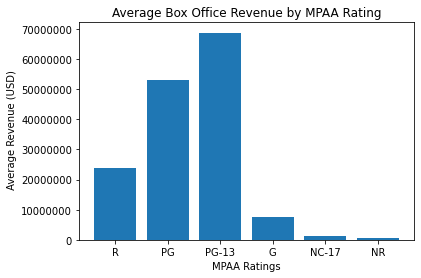

In [25]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(ratings_dict.keys(),ratings_dict.values() )



ax.set_title("Average Box Office Revenue by MPAA Rating")
ax.set_xlabel("MPAA Ratings")
ax.set_ylabel(" Average Revenue (USD)")

Text(0, 0.5, 'Median Revenue (USD)')

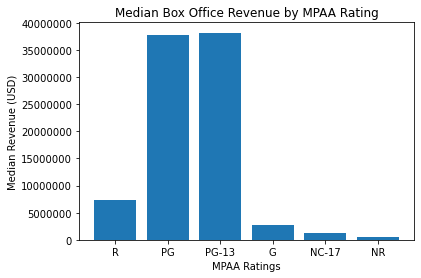

In [26]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(ratings_dict_med.keys(),ratings_dict_med.values() )



ax.set_title("Median Box Office Revenue by MPAA Rating")
ax.set_xlabel("MPAA Ratings")
ax.set_ylabel("Median Revenue (USD)")

In [27]:
action = movie_info[movie_info['genre'].str.contains('Action')]
action_rev=action['box_office'].mean()
action_med=action['box_office'].median()

In [28]:
drama = movie_info[movie_info['genre'].str.contains('Drama')]
drama_rev=drama['box_office'].mean()
drama_med=drama['box_office'].median()

In [29]:
comedy = movie_info[movie_info['genre'].str.contains('Comedy')]
comedy_rev=comedy['box_office'].mean()
comedy_med=comedy['box_office'].median()

In [30]:
horror = movie_info[movie_info['genre'].str.contains('Horror')]
horror_rev=horror['box_office'].mean()
horror_med=horror['box_office'].median()

In [31]:
romance = movie_info[movie_info['genre'].str.contains('Romance')]
romance_rev=romance['box_office'].mean()
romance_med=romance['box_office'].median()

In [32]:
top_genres_rev = {'action':action_rev,'drama':drama_rev,'comedy':comedy_rev,'horror':horror_rev,'romance':romance_rev}

Text(0, 0.5, 'Average Revenue (USD)')

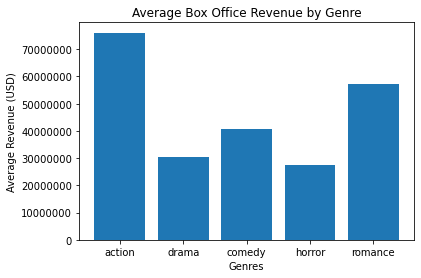

In [33]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(top_genres_rev.keys(),top_genres_rev.values() )





ax.set_title("Average Box Office Revenue by Genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Average Revenue (USD)")

In [35]:
top_genres_med = {'action':action_med,'drama':drama_med,'comedy':comedy_med,'horror':horror_med,'romance':romance_med}

Text(0, 0.5, 'Median Revenue in Tens of Millions (USD)')

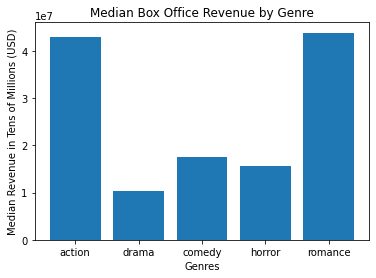

In [38]:
fig, ax=plt.subplots()
#plt.ticklabel_format(style='plain')
ax.bar(top_genres_med.keys(),top_genres_med.values() )





ax.set_title("Median Box Office Revenue by Genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Median Revenue in Tens of Millions (USD)")

In [ ]:
movie_info['box_office'].mean()

In [ ]:
comedy['box_office'].mean()

In [ ]:
comedy['box_office'].std()

In [ ]:
pop=movie_info['box_office']
com=comedy['box_office']
act=action['box_office']
drm=drama['box_office']
hor=horror['box_office']

In [ ]:
alpha = .05

In [ ]:
stats.norm.ppf(alpha), stats.norm.ppf(1-alpha)

In [ ]:
stats.ttest_ind(com,pop)

In [ ]:
stats.ttest_ind(act,pop)

In [ ]:
stats.ttest_ind(drm,pop)

In [ ]:
stats.ttest_ind(rom,pop)

In [ ]:
stats.ttest_ind(hor,pop)

In [ ]:
sorted_movie_info=movie_info.sort_values(by='box_office',ascending=False)
sorted_movie_info.head(10)

In [ ]:
##part 1 of creating csv out of sql table movie_basics
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM movie_basics
                               ''', conn)
sql_query

In [ ]:
##part 2 of creating csv out of sql table movie_basics
basics_df = pd.DataFrame(sql_query, columns = ['movie_id', 'primary_title', 'original_title','start_year','runtime_minutes','genres'])
basics_df

# Jake Umholtz 

## Business Understanding:

Assisting Computing Vision's new movie studio in deciding on what type of films they ought to create.

Stakeholder:

Computing Vision and their new movie studio.

Problem:

Computing Vision's new movie studio does not know what type of films they should create.

Value:

We measure of success is box office performance in terms of currency. We chose this measure of success because Computing Vision's movie studio is a brand new portion of their business, therefore the first priority of the new business to it generate actionable revenue by having early box office success. 


## Data Understanding

Data sources:

The data is from popular industry related services including: Box Office Mojo, a website that tracks box-office revenue; IMDB, the internet movie database; Rotten Tomatoes, a movie review website; The Movie DB, a database of films; and The Numbers, a data website that tracks box office revenue and other industry related information. 

Our primary data source is the Box Office Mojo dataset. We chose this source as it contained the necessary information regarding box office performance.

Rationale: The necessary Python libraries for performing data and statistical analysis.

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sqlite3

Rationale: Importing the data sources as variables to conduct data and statistical analysis.

In [ ]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_reviews = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

In [ ]:
# there are 1560 records in this dataset
original_rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
original_rt_movie_info.info()

In [ ]:
#quickly visualizing the dataframe 
original_rt_movie_info.head()

In [ ]:
# counting the total number of null values in the dataset
print(original_rt_movie_info.isnull().sum())

In [ ]:
# counting the none-null values in the box_office column
original_rt_movie_info['box_office'].count()

In [ ]:
# counting the none-null values in the runtime column
original_rt_movie_info['runtime'].count()

Rationale: By cleaning rt_movie_info, it allows us to perform data and statistical analysis on the data within the dataset. This data set is important for our business insights and recommendations as it contains the information related to run time of movies. 

In [ ]:
#Cleaning movie info data set

rt_movie_info = rt_movie_info.dropna()
# dropping the null values because the data set is large enough at over 1500 records to handle the loss of data
# the data is also highly varied, so filling in with the mean will not be the
# most accurate representation  
# However, it is important to note that by doing this we will lose data
box_office = []
for v in rt_movie_info['box_office'].dropna():
    box_office.append(box_office)



In [ ]:
# more cleaning of the data set
runtime_raw = []
runtime_clean = []
box_off_raw = []
box_off_clean = []
for val in rt_movie_info['runtime'].str[:3]: #extract first 3 characters,movies under 100 min will have whitespace
    runtime_raw.append(val)
for val in runtime_raw: #strip whitespace
    runtime_strip = val.replace(' ', '')
    runtime_clean.append(runtime_strip)
    
for val in rt_movie_info['box_office']:
    box_off_strip = val.replace(',', '')
    box_off_clean.append(box_off_strip)



rt_movie_info['runtime_clean'] = runtime_clean
rt_movie_info['box_office_clean'] = box_off_clean


In [ ]:
# sanity check on null values
print(rt_movie_info.isnull().sum())

In [ ]:
rt_movie_info.head()

In [ ]:
# checking the descriptive statistics
rt_movie_info['box_office_clean'].describe()

In [ ]:
# checking the descriptive statistics
rt_movie_info['runtime_clean'].describe()

In [ ]:
# turing the object in the cleaned columns into integers

rt_movie_info['box_office_clean'].astype(int)

In [ ]:
rt_movie_info['runtime_clean'].astype(int)

In [ ]:
# checking the median
rt_movie_info['box_office_clean'].median()

In [ ]:
# checking the median
rt_movie_info['runtime_clean'].median()

Rationale: By creating a new Pandas dataframe of just run time and box office 

In [ ]:
#Creating a new Pandas dataframe of just the runtime and box office information
df2 = rt_movie_info[['runtime_clean','box_office_clean']].copy()

#standardizing the type of data for the new dataframe
df2['runtime_clean'] = df2['runtime_clean'].astype(int)
df2['box_office_clean'] = df2['box_office_clean'].astype(int)

print(df2)

In [ ]:
# finding the correlation between runtime and box office performance
df2.corr()

There is a low to medium correlation between runtime and box office performance measured in USD

In [ ]:
# scatter plot of the correlation
fig, ax = plt.subplots()


ax.scatter(df2['runtime_clean'], df2['box_office_clean'], label="Films")



x_bounds = [min(df2['runtime_clean']), max(df2['runtime_clean'])]
y_bounds = [min(df2['box_office_clean']), max(df2['box_office_clean'])]



ax.plot(x_bounds, y_bounds, "--", label="Perfect Correlation", color='r')



ax.set_title("Runtime vs Box Office Revenue")
ax.set_xlabel("Runtime (Minutes)")
ax.set_ylabel("Box Office Performance (USD)")




ax.legend();

print(f' Low to medium correlation of 0.312')

There is a medium correlation between the run time of a film to its box office performance
We can conclude that there are other factors in play that contribute to box office performance other than run time.

In [ ]:
rt_movie_info.info()

In [ ]:
# counting the total number of null values in the dataset
print(original_rt_movie_info.isnull().sum())

In [ ]:
# counting the none-null values in the rating column
original_rt_movie_info['rating'].count()

In [ ]:
# creating a new dataframe of just the rating and the box office performance
df3 = rt_movie_info[['box_office_clean','rating']].copy()

In [ ]:
rt_movie_info['rating']

In [ ]:
# checking for null values
print(tn_movie_budgets.isnull().sum())

In [ ]:
# checking the dtype
tn_movie_budgets.info()

In [ ]:
# turning the budget into a string so it is easy to clean
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(str)

In [ ]:
# removing commas, dollar signs, and white space
# turning the production budget back into an integer so calculations can be performed
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(' ', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(int)

In [ ]:
tn_movie_budgets.head()

In [ ]:
tn_movie_budgets.info()

In [ ]:
# gathering descriptive statistics
tn_movie_budgets['production_budget'].describe()

In [ ]:
tn_movie_budgets['production_budget'].median()

In [ ]:
# counting the number of films with a production budget over $100 million

tn_movie_budgets[tn_movie_budgets['production_budget'] >= 100000000].count()